## Basic Descriptive Statistics on Road Safety 

This notebook explores the statistics of road safety downloaded from [data.gov.uk](https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data)

The road safety data is split into 3 different sets: 

1. Casualties - information on casualty age band, count, severity, location of casualty; 
2. Collisions - information of the collison including geographical coordinates, number of vehicles invovled, time, road conditions, speed limit, weather etc  
3. Vehicles - information of the cars including size etc 

These data sets are also available across time, so a time series analysis can be carried out as well. 

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.reset_option('display.max_columns')


In [14]:
import os
os.chdir('/home/jovyan/work/Quantitative-Methods')
print(os.getcwd())

/home/jovyan/work/Quantitative-Methods


In [110]:
dtype_dict = {0: 'str', 2: 'str'}

collision = pd.read_csv('data/dft-road-casualty-statistics-collision-2023.csv', dtype=dtype_dict)

In [111]:
collision

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
0,2.02301E+12,2023,10419171,525060.0,170416.0,-0.202878,51.418974,1,3,1,...,4,8,2,0,0,1,1,2,E01003383,-1
1,2.02301E+12,2023,10419183,535463.0,198745.0,-0.042464,51.671155,1,3,3,...,4,1,1,0,0,1,1,2,E01001547,-1
2,2.02301E+12,2023,10419189,508702.0,177696.0,-0.435789,51.487777,1,3,2,...,4,1,1,0,0,1,1,2,E01002448,-1
3,2.02301E+12,2023,10419191,520341.0,190175.0,-0.263972,51.597575,1,3,2,...,4,9,1,0,0,1,1,2,E01000129,-1
4,2.02301E+12,2023,10419192,527255.0,176963.0,-0.168976,51.477324,1,3,2,...,4,1,1,0,0,1,1,2,E01004583,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104253,2.02399E+12,2023,991452286,246754.0,661133.0,-4.447490,55.819059,99,2,1,...,5,2,2,-1,-1,1,1,-1,-1,7
104254,2.02399E+12,2023,991452640,224491.0,581627.0,-4.752200,55.097920,99,3,2,...,1,9,1,0,0,2,2,-1,-1,3
104255,2.02399E+12,2023,991453360,383341.0,806427.0,-2.276957,57.148422,99,3,2,...,4,2,2,-1,-1,1,1,-1,-1,3
104256,2.02399E+12,2023,991461915,271662.0,655488.0,-4.047591,55.775637,99,3,1,...,4,8,1,-1,-1,1,1,-1,-1,3


In [112]:
mask = collision['lsoa_of_accident_location'] == '-1'
collision = collision[~mask]
collision
#deleted those rows with -1 

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
0,2.02301E+12,2023,10419171,525060.0,170416.0,-0.202878,51.418974,1,3,1,...,4,8,2,0,0,1,1,2,E01003383,-1
1,2.02301E+12,2023,10419183,535463.0,198745.0,-0.042464,51.671155,1,3,3,...,4,1,1,0,0,1,1,2,E01001547,-1
2,2.02301E+12,2023,10419189,508702.0,177696.0,-0.435789,51.487777,1,3,2,...,4,1,1,0,0,1,1,2,E01002448,-1
3,2.02301E+12,2023,10419191,520341.0,190175.0,-0.263972,51.597575,1,3,2,...,4,9,1,0,0,1,1,2,E01000129,-1
4,2.02301E+12,2023,10419192,527255.0,176963.0,-0.168976,51.477324,1,3,2,...,4,1,1,0,0,1,1,2,E01004583,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100021,202363D036223,2023,63D036223,310228.0,290597.0,-3.324047,52.505853,63,3,1,...,1,1,1,0,0,1,1,-1,W01000483,-1
100022,202363D036323,2023,63D036323,315276.0,293879.0,-3.250532,52.536159,63,3,2,...,1,1,1,0,0,2,1,-1,W01000439,-1
100023,202363D037923,2023,63D037923,298963.0,218239.0,-3.468376,51.853568,63,3,2,...,1,1,2,0,0,2,1,-1,W01001897,-1
100024,202363DF00223,2023,63DF00223,305338.0,326185.0,-3.406302,52.824853,63,1,1,...,1,1,4,0,0,2,1,-1,W01001906,-1


In [113]:
lsoa = pd.read_csv('data/lsoa_name.csv')
lsoa.head()
lsoa_list = lsoa.values.tolist() # change column to list 
print(lsoa_list[:10]) #but this generate a list of lists, which is what we do not want, we want a list 

import itertools

lsoa_list = list(itertools.chain.from_iterable(lsoa_list))
print(lsoa_list[:10]) #removed the big list brackets [] 

[['E01000001'], ['E01000002'], ['E01000003'], ['E01000005'], ['E01000006'], ['E01000007'], ['E01000008'], ['E01000009'], ['E01000011'], ['E01000012']]
['E01000001', 'E01000002', 'E01000003', 'E01000005', 'E01000006', 'E01000007', 'E01000008', 'E01000009', 'E01000011', 'E01000012']


In [114]:
filtered_collision = collision[collision['lsoa_of_accident_location'].isin(lsoa_list)]
filtered_collision


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
0,2.02301E+12,2023,10419171,525060.0,170416.0,-0.202878,51.418974,1,3,1,...,4,8,2,0,0,1,1,2,E01003383,-1
1,2.02301E+12,2023,10419183,535463.0,198745.0,-0.042464,51.671155,1,3,3,...,4,1,1,0,0,1,1,2,E01001547,-1
2,2.02301E+12,2023,10419189,508702.0,177696.0,-0.435789,51.487777,1,3,2,...,4,1,1,0,0,1,1,2,E01002448,-1
3,2.02301E+12,2023,10419191,520341.0,190175.0,-0.263972,51.597575,1,3,2,...,4,9,1,0,0,1,1,2,E01000129,-1
4,2.02301E+12,2023,10419192,527255.0,176963.0,-0.168976,51.477324,1,3,2,...,4,1,1,0,0,1,1,2,E01004583,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87863,2.02348E+12,2023,481407567,531350.0,181567.0,-0.108331,51.517763,48,2,1,...,4,8,2,0,0,1,3,2,E01000917,5
87864,2.02348E+12,2023,481409647,531556.0,181647.0,-0.105334,51.518434,48,2,1,...,4,1,1,0,0,1,1,2,E01032740,7
87865,2.02348E+12,2023,481409652,533386.0,181660.0,-0.078970,51.518122,48,3,1,...,4,2,2,0,0,1,1,2,E01032739,3
87866,2.02348E+12,2023,481409658,531594.0,181423.0,-0.104870,51.516412,48,3,2,...,4,1,1,0,0,1,3,2,E01032740,3


In [20]:
collision['accident_severity'].unique()

array([3, 2, 1])

In [21]:
collision['number_of_vehicles'].unique()

array([ 1,  3,  2,  5,  6,  4,  7,  8, 12,  9, 17, 14, 11, 13, 10])

In [22]:
collision['speed_limit'].unique()

array([20, 30, 50, 40, 70, 60])

In [23]:
pd.reset_option('display.max_rows')
list1 = collision['time'].unique()
list1

array(['1:24', '2:25', '3:50', ..., '5:01', '6:21', '3:34'], dtype=object)

In [24]:
collision['day_of_week'].unique()

array([1, 2, 3, 4, 5, 6, 7])

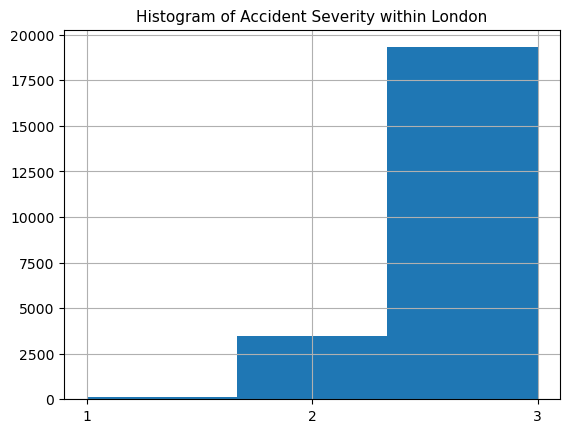

In [25]:
collision_severity = filtered_collision['accident_severity']

import matplotlib.ticker as mticker 
ax = collision_severity.hist(bins=3, )
ax.set_title("Histogram of Accident Severity within London", fontsize=11, color='black')
ax.xaxis.set_major_locator(mticker.MultipleLocator(1))

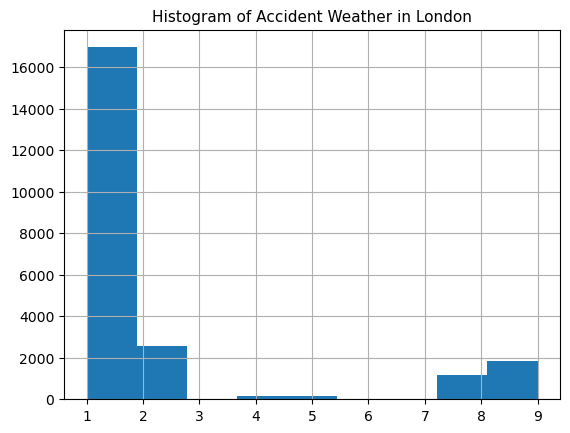

In [26]:
collision_weather = filtered_collision['weather_conditions']

import matplotlib.ticker as mticker 
ax = collision_weather.hist(bins=9, )
ax.set_title("Histogram of Accident Weather in London", fontsize=11, color='black')
ax.xaxis.set_major_locator(mticker.MultipleLocator(1))

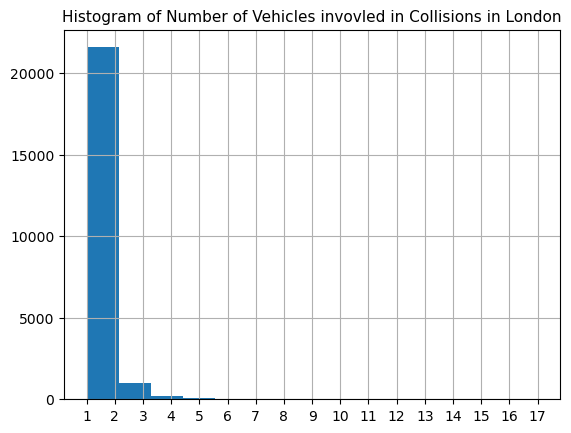

In [27]:
collision_vehicle = filtered_collision['number_of_vehicles']

import matplotlib.ticker as mticker 
ax = collision_vehicle.hist(bins=14, )
ax.set_title("Histogram of Number of Vehicles invovled in Collisions in London", fontsize=11, color='black')
ax.xaxis.set_major_locator(mticker.MultipleLocator(1))

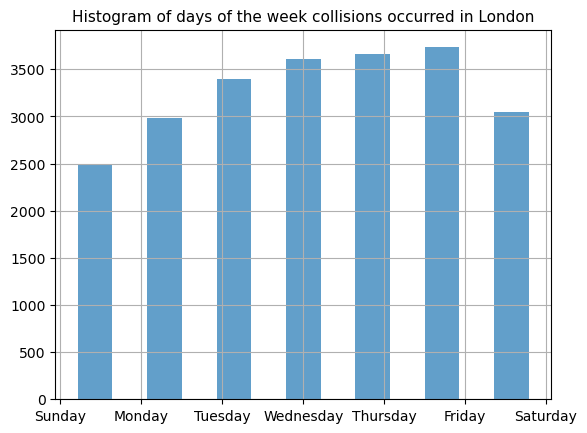

In [28]:
collision_day = filtered_collision['day_of_week']
day_mapping = {
    1: "Sunday",
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday",
    7: "Saturday"
}

# Replace values in the column
collision_day = collision_day.replace(day_mapping)

import matplotlib.ticker as mticker 
ax = collision_day.hist(bins=7, alpha=0.7, rwidth=0.5)
ax.set_title("Histogram of days of the week collisions occurred in London", fontsize=11, color='black')
ax.xaxis.set_major_locator(mticker.MultipleLocator(1))

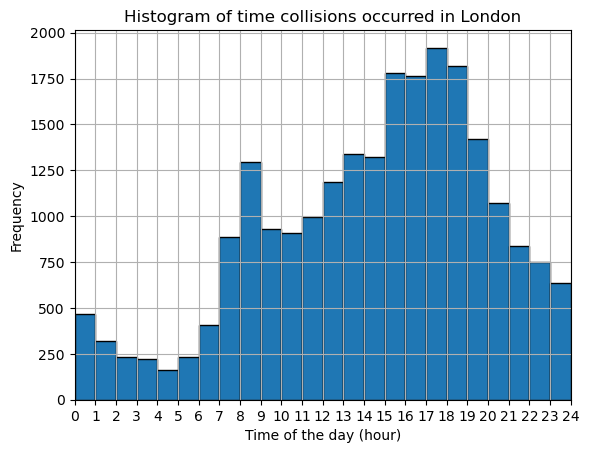

In [29]:
time = filtered_collision['time'].str.split(':').str[0].astype(int)
time = time.sort_values()

import matplotlib.ticker as mticker 

ax = time.hist(bins=np.arange(0, 25, 1), edgecolor='black', grid=True)

# Set the x-axis limit to be from 0 to 24
ax.set_xlim(0, 24)
ax.xaxis.set_major_locator(mticker.MultipleLocator(1))

# Add title and labels
plt.title('Histogram of time collisions occurred in London')
plt.xlabel('Time of the day (hour)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Text(0, 0.5, 'Frequency')

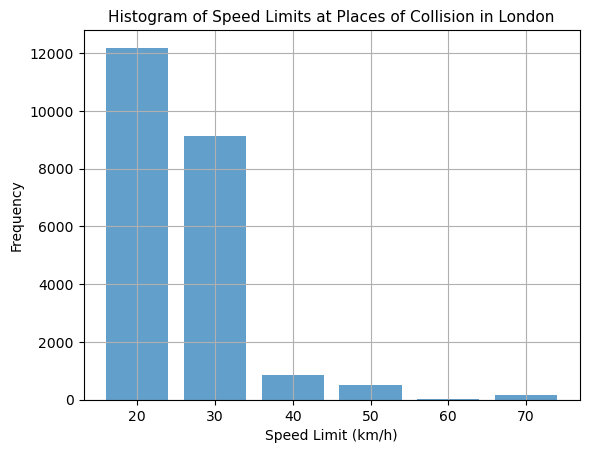

In [30]:
collision_speed = filtered_collision['speed_limit']
bin_edges = [15, 25, 35, 45, 55, 65, 75] 

import matplotlib.ticker as mticker 
ax = collision_speed.hist(bins=bin_edges, alpha=0.7, rwidth=0.8)
ax.set_title("Histogram of Speed Limits at Places of Collision in London", fontsize=11, color='black')
plt.xlabel('Speed Limit (km/h)')
plt.ylabel('Frequency')

# Poisson Regression Model 
## Model accident rates by the time of day and investigate whether accidents occur more frequently at specific times

Dependent Variable (Response): Number of accidents (𝑌) during a given time period.

Independent Variable (Predictor): Time of day (e.g., hours or categorical ranges like "morning," "afternoon").

Exposure Variable: Denominator for the accident rate, such as the total number of vehicles or duration (e.g., hours).

## Step 1: Prepare Data for Dependent Variable (Number of Accidents during given hour) 

In [109]:
time2 = filtered_collision[['time']]
print(time2['time'].dtype)

object


In [115]:
time2.loc[:, 'hour'] = time2['time'].str.split(':').str[0].astype(int)
time2['hour'].unique()
time2

,time,hour
0,1:24,1
1,2:25,2
2,3:50,3
3,2:13,2
4,1:42,1
...,...,...
87863,19:15,19
87864,18:00,18
87865,23:00,23
87866,7:15,7


In [118]:
counts = time2['hour'].value_counts().reset_index()
# Rename the columns for clarity
counts.columns = ['hour', 'count']
counts

,hour,count
0,17,1918
1,18,1817
2,15,1778
3,16,1765
4,19,1423
5,13,1337
6,14,1325
7,8,1298
8,12,1187
9,20,1071


In [125]:
tcount = pd.read_csv('data/dft-traffic-count.csv', low_memory=False)
filtert =  tcount[tcount['year'] == 2023]
total_values = filtert.groupby('hour')['all_motor_vehicles'].sum().reset_index()
total_values

,hour,all_motor_vehicles
0,7,865860.0
1,8,863085.0
2,9,794013.0
3,10,748392.0
4,11,757468.0
5,12,781128.0
6,13,796331.0
7,14,836650.0
8,15,879426.0
9,16,915726.0


In [126]:
tcount['hour'].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [133]:
poisson = pd.merge(total_values, counts,how='left', on=['hour'])
poisson

,hour,all_motor_vehicles,count
0,7,865860.0,888
1,8,863085.0,1298
2,9,794013.0,931
3,10,748392.0,910
4,11,757468.0,994
5,12,781128.0,1187
6,13,796331.0,1337
7,14,836650.0,1325
8,15,879426.0,1778
9,16,915726.0,1765


In [135]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

poisson['log_traffic_volume'] = np.log(poisson['all_motor_vehicles'])
model = smf.glm(
    formula='count ~ hour',
    data=poisson,
    family=sm.families.Poisson(),
    offset=poisson['log_traffic_volume']
).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                   12
Model:                            GLM   Df Residuals:                       10
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -119.39
Date:                Sun, 17 Nov 2024   Deviance:                       130.73
Time:                        22:39:45   Pearson chi2:                     135.
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.1918      0.031   -228.498      0.0

0.0583 for the coef of hour means that accident rates increase by approximately 5.83% per additional hour.

-7.1918 for the coef of intercept means that accident rate at midnight = e^-7.1918 

Since the p-value for time_of_day is less than 0.05 (0.000), we can conclude that time of day significantly affects accident rate

In [142]:
p_value_time_of_day = model.pvalues['hour']
# Print the p-value with more decimals
print(f"P-value for time_of_day: {p_value_time_of_day:.20f}")

P-value for time_of_day: 0.00000000000000000000


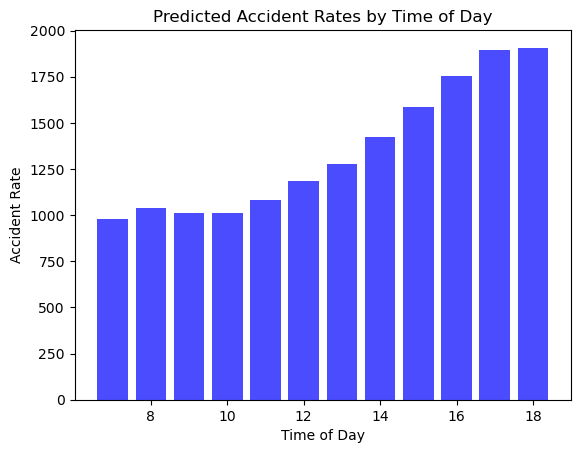

In [137]:
import matplotlib.pyplot as plt
import numpy as np

# Predicted rates
poisson['predicted_accidents'] = model.predict()
plt.bar(poisson['hour'], poisson['predicted_accidents'], color='blue', alpha=0.7)
plt.title("Predicted Accident Rates by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Accident Rate")
plt.show()

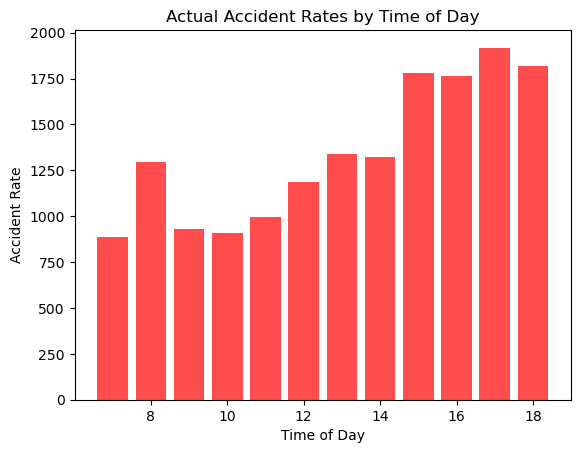

In [139]:
plt.bar(poisson['hour'], poisson['count'], color='red', alpha=0.7)
plt.title("Actual Accident Rates by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Accident Rate")
plt.show()

In [143]:
print(f"AIC: {model.aic}")

AIC: 242.78409141452357


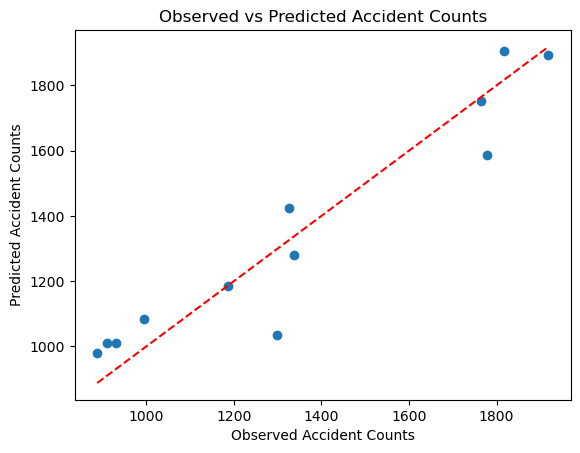

In [151]:
predicted_values = model.fittedvalues

import matplotlib.pyplot as plt

# Observed values

# Plot observed vs predicted
plt.scatter(poisson['count'], predicted_values)
plt.xlabel("Observed Accident Counts")
plt.ylabel("Predicted Accident Counts")
plt.title("Observed vs Predicted Accident Counts")

plt.plot([min(poisson['count']), max(poisson['count'])], 
         [min(poisson['count']), max(poisson['count'])], 
         color='red', linestyle='--', label='Ideal: Observed = Predicted')
plt.show()


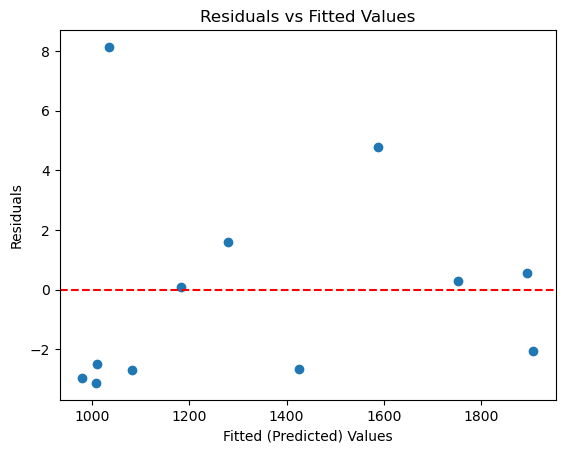

In [148]:
residuals = model.resid_pearson

plt.scatter(predicted_values, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Fitted (Predicted) Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

This plot is useful for checking for patterns in residuals. Residuals should be scattered randomly around zero with no clear pattern, suggesting that the model's assumptions hold.

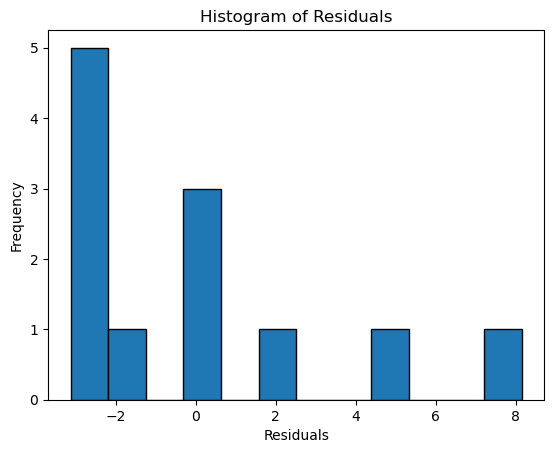

In [150]:
plt.hist(residuals, bins=12, edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

In [15]:
filtered_collision

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
0,2.02301E+12,2023,10419171,525060.0,170416.0,-0.202878,51.418974,1,3,1,...,4,8,2,0,0,1,1,2,E01003383,-1
1,2.02301E+12,2023,10419183,535463.0,198745.0,-0.042464,51.671155,1,3,3,...,4,1,1,0,0,1,1,2,E01001547,-1
2,2.02301E+12,2023,10419189,508702.0,177696.0,-0.435789,51.487777,1,3,2,...,4,1,1,0,0,1,1,2,E01002448,-1
3,2.02301E+12,2023,10419191,520341.0,190175.0,-0.263972,51.597575,1,3,2,...,4,9,1,0,0,1,1,2,E01000129,-1
4,2.02301E+12,2023,10419192,527255.0,176963.0,-0.168976,51.477324,1,3,2,...,4,1,1,0,0,1,1,2,E01004583,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87863,2.02348E+12,2023,481407567,531350.0,181567.0,-0.108331,51.517763,48,2,1,...,4,8,2,0,0,1,3,2,E01000917,5
87864,2.02348E+12,2023,481409647,531556.0,181647.0,-0.105334,51.518434,48,2,1,...,4,1,1,0,0,1,1,2,E01032740,7
87865,2.02348E+12,2023,481409652,533386.0,181660.0,-0.078970,51.518122,48,3,1,...,4,2,2,0,0,1,1,2,E01032739,3
87866,2.02348E+12,2023,481409658,531594.0,181423.0,-0.104870,51.516412,48,3,2,...,4,1,1,0,0,1,3,2,E01032740,3


In [60]:
dtype_dict = {0: 'str', 2: 'str'}

casualty = pd.read_csv('data/dft-road-casualty-statistics-casualty-last-5-years.csv', dtype=dtype_dict)

mask = casualty['lsoa_of_casualty'] == '-1'
casualty = casualty[~mask]
filtered_casualty = casualty[casualty['lsoa_of_casualty'].isin(lsoa_list)]
#23841 data points 

severity = filtered_casualty[['casualty_severity','lsoa_of_casualty','accident_year']]
severity2023 = severity[severity['accident_year'] == 2023]
severity2022 = severity[severity['accident_year'] == 2022]
severity2021 = severity[severity['accident_year'] == 2021]
#split based on year 

counts = severity2023['lsoa_of_casualty'].value_counts()
count_unique2023 = severity2023.drop_duplicates(subset='lsoa_of_casualty').copy()
count_unique2023['count'] = severity2023['lsoa_of_casualty'].map(counts)
count_unique2023

counts2 = severity2022['lsoa_of_casualty'].value_counts()
count_unique2022 = severity2022.drop_duplicates(subset='lsoa_of_casualty').copy()
count_unique2022['count'] = severity2022['lsoa_of_casualty'].map(counts)

counts3 = severity2021['lsoa_of_casualty'].value_counts()
count_unique2021 = severity2021.drop_duplicates(subset='lsoa_of_casualty').copy()
count_unique2021['count'] = severity2021['lsoa_of_casualty'].map(counts)
count_unique2021

,casualty_severity,lsoa_of_casualty,accident_year,count
268743,3,E01003955,2021,8.0
268744,3,E01004202,2021,7.0
268745,2,E01004295,2021,6.0
268746,3,E01002056,2021,9.0
268747,2,E01003024,2021,10.0
...,...,...,...,...
383560,3,E01032583,2021,6.0
383932,2,E01004029,2021,7.0
384102,2,E01003808,2021,5.0
385060,3,E01004101,2021,5.0


# Calculating Casualty Rate and Casualty Location Rate 

In [61]:
count_unique2023['lsoa'] = count_unique2023['lsoa_of_casualty']
count_unique2022['lsoa'] = count_unique2022['lsoa_of_casualty']
count_unique2021['lsoa'] = count_unique2021['lsoa_of_casualty']

pop = pd.read_csv("data/population_count.csv")
dataframes = [pop]

# Loop through each dataframe
for i, item in enumerate(dataframes):
    item.dropna(subset=['lsoa'], inplace=True)   # Drop rows with NaN in 'lsoa'
    item['lsoa'] = item['lsoa'].str[:9]  # Truncate 'lsoa' to first 9 characters
    item = item[item['lsoa'].isin(lsoa_list)] 
    print(f"After filtering: {item.shape[0]} rows")

pop = pop[pop['lsoa'].isin(lsoa_list)]
count = pd.merge(count_unique2023, pop, on='lsoa', how='left')
count = count.rename(columns={'2021': 'pop'})
count['pop'] = count['pop'].str.replace(',', '', regex=False)  # Remove commas
count['pop'] = pd.to_numeric(count['pop'], errors='coerce')
count['casualty_rate'] = 1000 * count['count'] / count['pop'] # calculating casualty rate 

count2 = pd.merge(count_unique2022, pop, on='lsoa', how='left')
count2 = count2.rename(columns={'2021': 'pop'})
count2['pop'] = count2['pop'].str.replace(',', '', regex=False)  # Remove commas
count2['pop'] = pd.to_numeric(count2['pop'], errors='coerce')
count2['casualty_rate'] = 1000 * count2['count'] / count2['pop']

count3 = pd.merge(count_unique2021, pop, on='lsoa', how='left')
count3 = count3.rename(columns={'2021': 'pop'})
count3['pop'] = count3['pop'].str.replace(',', '', regex=False)  # Remove commas
count3['pop'] = pd.to_numeric(count3['pop'], errors='coerce')
count3['casualty_rate'] = 1000 * count3['count'] / count3['pop']

After filtering: 4994 rows


In [62]:
# reading deprivation ranking 1 - 10 
imd = pd.read_csv("data/lsoa-reference-data.csv")
imd = imd[['LSOA Code','IMD Decile','Census Year']]
imd = imd[imd['Census Year'] == 2021]
imd = imd.rename(columns={'LSOA Code': 'lsoa'})

In [63]:
# merge 2021, 2022 and 2023 casualty rate with deprivation ranking 
count = pd.merge(count, imd, on='lsoa', how='left')
count2 = pd.merge(count2, imd, on='lsoa', how='left')
count3 = pd.merge(count3, imd, on='lsoa', how='left')

In [67]:
# ensure all column has values and renaming to prevent errors when merging later
count.dropna(subset=['IMD Decile'], inplace=True)
count2.dropna(subset=['IMD Decile'], inplace=True)
count3.dropna(subset=['IMD Decile'], inplace=True)
count2 = count2.rename(columns={'casualty_rate': 'rate2022'})
count3 = count3.rename(columns={'casualty_rate': 'rate2021'})

In [73]:
# merge all years casualty rate 
count_all = pd.merge(count, count2, on='lsoa', how='left')
count_all = pd.merge(count_all, count3, on='lsoa', how='left')
count_all.dropna(subset=['IMD Decile'], inplace=True)

In [74]:
# tidy columns, find average casualty rate 2021-2023
count_all = count_all[['lsoa','IMD Decile','casualty_rate','rate2021','rate2022']]
count_all['average'] = (count_all['casualty_rate'] + count_all['rate2021'] + count_all['rate2022'] ) / 3

In [79]:
count_all.dropna(subset=['average'], inplace=True)
count_all

,lsoa,IMD Decile,casualty_rate,rate2021,rate2022,average
0,E01001546,3.0,3.309432,3.309432,3.309432,3.309432
1,E01002443,5.0,4.409603,4.409603,4.409603,4.409603
2,E01004679,3.0,3.544304,3.544304,3.544304,3.544304
3,E01003629,3.0,3.081664,3.081664,3.081664,3.081664
4,E01000989,7.0,2.883506,2.883506,2.883506,2.883506
...,...,...,...,...,...,...
4502,E01003812,9.0,0.538793,0.538793,0.538793,0.538793
4503,E01000346,8.0,1.259446,1.259446,1.259446,1.259446
4504,E01004351,6.0,0.607903,0.607903,0.607903,0.607903
4506,E01000136,8.0,0.672948,0.672948,0.672948,0.672948


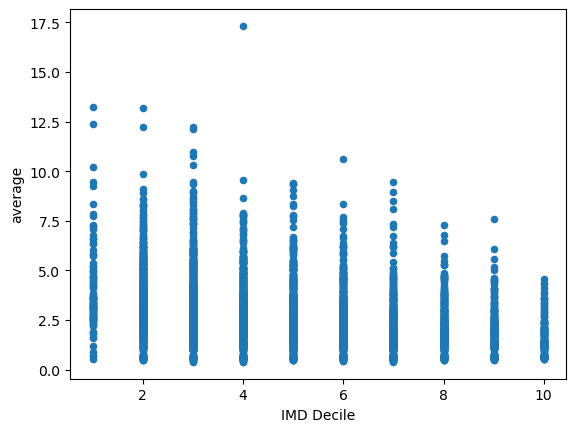

In [80]:
count_all.plot(kind = 'scatter', x = 'IMD Decile', y = 'average')
plt.show()

In [81]:
average_decile = count_all.groupby('IMD Decile')['average'].mean()
average_df = average_decile.reset_index()
average_df

,IMD Decile,average
0,1.0,4.144572
1,2.0,3.462926
2,3.0,3.322077
3,4.0,2.984184
4,5.0,2.890623
5,6.0,2.624476
6,7.0,2.279514
7,8.0,2.091919
8,9.0,1.822608
9,10.0,1.590366


In [89]:
olddata = {
    'IMD Decile': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'average': [4.43, 3.86, 3.50,3.22,2.99,2.68,2.42,2.08,1.86,1.66]
}

df1 = pd.DataFrame(olddata)

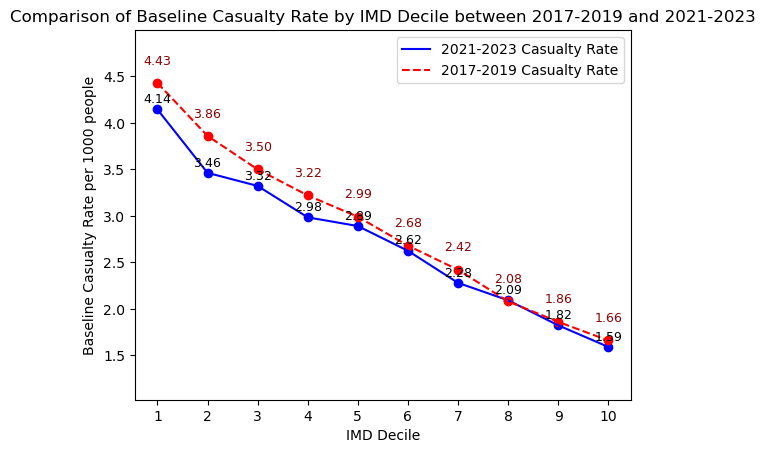

In [150]:
plt.scatter(average_df['IMD Decile'], average_df['average'], color='blue')
plt.plot(average_df['IMD Decile'], average_df['average'], color='blue', linestyle='-', label='2021-2023 Casualty Rate')

# Second scatter plot with line (example data for a second dataset)
# Replace `median_values` with your second dataset values
plt.scatter(df1['IMD Decile'], df1['average'], color='red')
plt.plot(df1['IMD Decile'], df1['average'], color='red', linestyle='--', label='2017-2019 Casualty Rate')

for i in range(len(average_df)):
    plt.text(
        average_df['IMD Decile'][i],                # x-coordinate of the point
        average_df['average'][i] + 0.07,            # y-coordinate slightly above the point
        f"{average_df['average'][i]:.2f}",         # Text to display (formatted to 2 decimals)
        ha='center',                               # Horizontal alignment
        fontsize=9,                                # Font size
        color='black'                              # Text color
    )
    plt.text(
        df1['IMD Decile'][i], 
        df1['average'][i] + 0.2, 
        f"{df1['average'][i]:.2f}", 
        ha='center', fontsize=9, color='darkred'
    )

plt.xticks(ticks=range(1, 11))
# Add labels, title, and legend
plt.xlabel('IMD Decile')
plt.ylabel('Baseline Casualty Rate per 1000 people')
plt.title('Comparison of Baseline Casualty Rate by IMD Decile between 2017-2019 and 2021-2023')
plt.legend()

plt.margins(y=0.2) 

# Show the plot
plt.show()

Baseline casualty rate from 2021-2023 decreased almost across all IMD Decile except for decile 7 compared to 2019-2021, indicating that 
1. There are less casualties in this time period compared to 2019-2021, which might signal better overall road safety for all. 
2. Biggest drops in casualty rates are found in the most deprived deciles such as decile 2 (-0.4), decile 1 (0.29), and decile 4 (0.24). This indicates that casualty rates are becoming less unequal over time. 

# Casualty Location Rate Calculation

In [127]:
collision1 = pd.read_csv("data/dft-road-casualty-statistics-collision-last-5-years.csv", dtype=dtype_dict)

mask = collision1['lsoa_of_accident_location'] == '-1'
collision1 = collision1[~mask]
collision1

filtered_collision = collision1[collision1['lsoa_of_accident_location'].isin(lsoa_list)]

filtered_collision = filtered_collision[['number_of_casualties','lsoa_of_accident_location','accident_year']].rename(columns={'lsoa_of_accident_location': 'lsoa'})
summed_counts = filtered_collision.groupby(['lsoa', 'accident_year'])['number_of_casualties'].sum().reset_index()
# Rename columns for clarity (optional)
summed_counts.columns = ['lsoa', 'year','count']
summed_counts


,lsoa,year,count
0,E01000001,2019,14
1,E01000001,2020,8
2,E01000001,2021,4
3,E01000001,2022,2
4,E01000001,2023,7
...,...,...,...
20334,E01033746,2019,1
20335,E01033746,2020,3
20336,E01033746,2021,6
20337,E01033746,2022,1


In [129]:
coll2023 = summed_counts[summed_counts['year'] == 2023]
coll2022 = summed_counts[summed_counts['year'] == 2022]
coll2021 = summed_counts[summed_counts['year'] == 2021]

imd = pd.read_csv("data/lsoa-reference-data.csv")
imd = imd[imd['Census Year'] == 2021]
imd = imd.rename(columns={'LSOA Code': 'lsoa'})

,Census Year,lsoa,Road Length,Population,IMD Decile
4835,2021,E01000001,2855.474246,1475,9
4836,2021,E01000002,4288.325821,1384,10
4837,2021,E01000003,1073.346027,1616,5
4838,2021,E01000005,4528.304022,1103,3
4839,2021,E01000006,2703.273461,1845,5
...,...,...,...,...,...
9824,2021,E01035718,17495.817160,2568,8
9825,2021,E01035719,1919.390834,1272,6
9826,2021,E01035720,2317.296223,1217,6
9827,2021,E01035721,5156.255294,2328,4


In [140]:
coll = pd.merge(summed_counts, imd, on='lsoa', how='left')
coll['location_rate'] = (coll['count'] / coll['Road Length'] ) *1000
list1 = [2021, 2022, 2023]
coll = coll[coll['year'].isin(list1)]
coll

,lsoa,year,count,Census Year,Road Length,Population,IMD Decile,location_rate
2,E01000001,2021,4,2021,2855.474246,1475,9,1.400818
3,E01000001,2022,2,2021,2855.474246,1475,9,0.700409
4,E01000001,2023,7,2021,2855.474246,1475,9,2.451432
7,E01000002,2021,4,2021,4288.325821,1384,10,0.932765
8,E01000002,2022,8,2021,4288.325821,1384,10,1.865530
...,...,...,...,...,...,...,...,...
20332,E01033745,2022,25,2021,9274.556671,1783,4,2.695547
20333,E01033745,2023,3,2021,9274.556671,1783,4,0.323466
20336,E01033746,2021,6,2021,3258.289223,1471,4,1.841457
20337,E01033746,2022,1,2021,3258.289223,1471,4,0.306910


In [144]:
coll = coll.groupby(['IMD Decile'])['location_rate'].mean().reset_index()
coll

olddata1 = {
    'IMD Decile': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'average': [2.5, 2.16, 1.95,1.73,1.47,1.50,1.16,1.16,0.78,0.60]
}

df2 = pd.DataFrame(olddata1)

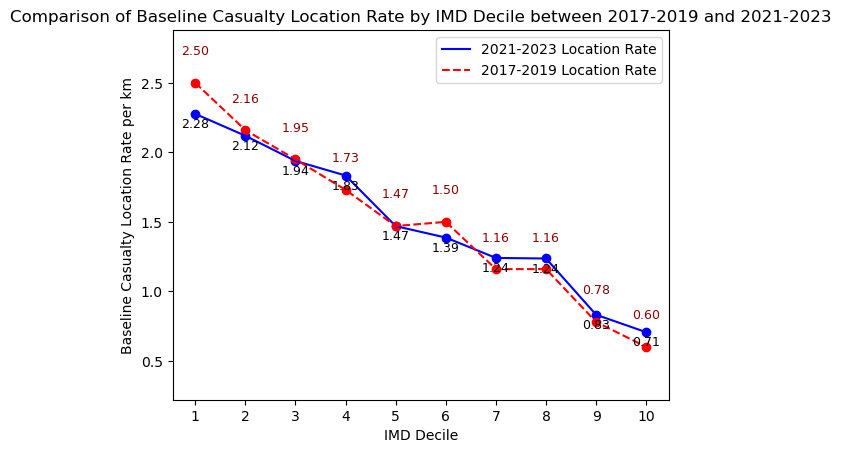

In [149]:
plt.scatter(coll['IMD Decile'], coll['location_rate'], color='blue')
plt.plot(coll['IMD Decile'], coll['location_rate'], color='blue', linestyle='-', label='2021-2023 Location Rate')

# Second scatter plot with line (example data for a second dataset)
# Replace `median_values` with your second dataset values
plt.scatter(df2['IMD Decile'], df2['average'], color='red')
plt.plot(df2['IMD Decile'], df2['average'], color='red', linestyle='--', label='2017-2019 Location Rate')

for i in range(len(coll)):
    plt.text(
        coll['IMD Decile'][i],                # x-coordinate of the point
        coll['location_rate'][i] -0.1,            # y-coordinate slightly above the point
        f"{coll['location_rate'][i]:.2f}",         # Text to display (formatted to 2 decimals)
        ha='center',                               # Horizontal alignment
        fontsize=9,                                # Font size
        color='black'                              # Text color
    )
    plt.text(
        df2['IMD Decile'][i], 
        df2['average'][i] + 0.2, 
        f"{df2['average'][i]:.2f}", 
        ha='center', fontsize=9, color='darkred'
    )

plt.xticks(ticks=range(1, 11))
# Add labels, title, and legend
plt.xlabel('IMD Decile')
plt.ylabel('Baseline Casualty Location Rate per km')
plt.title('Comparison of Baseline Casualty Location Rate by IMD Decile between 2017-2019 and 2021-2023')
plt.legend()

plt.margins(y=0.2) 

# Show the plot
plt.show()